# Baltimore Victim Based Crime Data

The newest Geopandas doesn't work with the newest Shapely, so first install a specific version of Shapely. Uninstall the current Shapely and install it again with correct version:

$ sudo pip3 uninstall geopandas

$ sudo pip3 install geopandas==0.3.0

Do the necessaries imports:

In [177]:
%matplotlib inline

import numpy as np
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import shapefile as shp

from datetime import datetime

# use the style of ggplot (R) for graphics 
# (it is more beautiful)
from matplotlib.style import use
use('ggplot')

In [2]:
from os import makedirs
from os.path import exists, isfile, getsize

# import urllib.request as urllib       # Python 2.7
from urllib.request import urlretrieve  # Python 3

If the temporaries directories don't exist, so create them:

In [3]:
path_of_folders = ["files/data/", "files/shp/"]

for path_of_folder in path_of_folders:
    if not exists(path_of_folder):
        makedirs(path_of_folder)

# Download the ShapeFile and CSV data

Download the CSV data from https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij

https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/va67-qdnf

https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/m4bq-g6rz

https://data.baltimorecity.gov/Public-Safety/Untitled-Visualization-Based-on-BPD-Part-1-Victim-/bwjt-dcsc

In [4]:
based_crime_data_data = "files/data/Based_Crime_Data.csv"

In [5]:
based_crime_data_csv = "https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv?accessType=DOWNLOAD"

# download the file
# urlretrieve(based_crime_data_csv, based_crime_data_csv)

if isfile(based_crime_data_data):
    tam = getsize(based_crime_data_data)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  40538138  bytes.


Download the ShapeFile of Baltimore from https://data.baltimorecity.gov/Geographic/Land-use-Shape/feax-3ycj

In [6]:
shape_file_data = "files/shp/landuse.zip"

In [7]:
shape_file_zip = "https://data.baltimorecity.gov/api/views/feax-3ycj/files/hMHrtD_9UtnfKw47cqs_2RYH9ZXET7TlpW4V4_4A_IE?filename=Landuse.zip"

# download the file
# urlretrieve(shape_file_zip, shape_file_data)

if isfile(shape_file_data):
    tam = getsize(shape_file_data)
    print("File downloaded, ", tam, " bytes.")
else:
    print("Error downloading file!")

File downloaded,  3709817  bytes.


The projection of the points in dataframe is WGS84 (EPSG:4326) and the shapefile of Baltimore I have no idea... So I used the QGIS to reproject the shapefile to WGS84 (EPSG:4326)

# Read the ShapeFile and CSV data

Load the Shapefile using geopandas to use it in the future:

In [8]:
shape_file_path = "files/shp/landuse_4326/landuse_4326.shp"  

shape_file_data_gp = gpd.read_file(shape_file_path)

# avoid missing (NaN) values
# shape_file_data = shape_file_data[shape_file_data.geometry.notnull()]

shape_file_data_gp.crs

{'init': 'epsg:4326'}

In [9]:
shape_file_data_gp.head()

,LU_2008,Shape_Leng,Shape_Area,geometry
0,Low Density Residential,814.879889,39162.588802,POLYGON ((-76.63202678843903 39.32761753657134...
1,Low Density Residential,1328.399489,108192.459482,"POLYGON ((-76.6002548745586 39.32244777330502,..."
2,Low Density Residential,1418.039915,75312.735463,POLYGON ((-76.59451222737226 39.32068341521047...
3,Low Density Residential,2788.871558,455559.444337,POLYGON ((-76.65339222090071 39.33261332482496...
4,Low Density Residential,898.177248,50353.730253,POLYGON ((-76.53693066711821 39.36853839332729...


# Cleaning the data

Read the CSV keeping the same header:

In [31]:
df_crimes = pd.read_csv(based_crime_data_data)

Renaming the "Location.1" column to "Lat_Long" from df_crimes:

In [32]:
df_crimes = df_crimes.rename(columns={"Location 1": "Lat_Long"})

All cells with NaN values, I change them to a string called "UNDEFINED" (to avoid problems...):

In [33]:
df_crimes["Weapon"] = df_crimes["Weapon"].fillna("UNDEFINED")

df_crimes["Description"] = df_crimes["Description"].fillna("UNDEFINED")

df_crimes["Weapon"] = df_crimes["Weapon"].fillna("UNDEFINED")

df_crimes["Neighborhood"] = df_crimes["Neighborhood"].fillna("UNDEFINED")

df_crimes["Premise"] = df_crimes["Premise"].fillna("UNDEFINED")

# don't use this, because I don't want to switch some specifics columns, 
# like longitude and latitude
# df_crimes = df_crimes.fillna("UNDEFINED")

df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Lat_Long,Premise,Total Incidents
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,Burleith-Leighton,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,1
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,1
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,1
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,1
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,Allendale,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,1


Remove the "Total Incidents", because it is the same value (1) for all rows:

In [34]:
df_crimes = df_crimes.drop('Total Incidents', 1)

## Transform types values in categories (factors)

Transform the types to category (factor) and put in dataframe with a new name:

In [35]:
df_crimes["DescriptionFactor"] = df_crimes["Description"].astype('category')

df_crimes["WeaponFactor"] = df_crimes["Weapon"].astype('category')

df_crimes["NeighborhoodFactor"] = df_crimes["Neighborhood"].astype('category')

df_crimes["PremiseFactor"] = df_crimes["Premise"].astype('category')

df_crimes["InsideOutsideFactor"] = df_crimes["Inside/Outside"].astype('category')

df_crimes["DistrictFactor"] = df_crimes["District"].astype('category')

# slicing by indexes
# df_crimes[df_crimes.columns[6:]].head() 

# slicing by columns
df_crimes[["Description", "DescriptionFactor", "Weapon", "WeaponFactor",
    "Neighborhood", "NeighborhoodFactor", "Premise", "PremiseFactor",
    "Inside/Outside", "InsideOutsideFactor", "District", "DistrictFactor"]].head()

,Description,DescriptionFactor,Weapon,WeaponFactor,Neighborhood,NeighborhoodFactor,Premise,PremiseFactor,Inside/Outside,InsideOutsideFactor,District,DistrictFactor
0,LARCENY FROM AUTO,LARCENY FROM AUTO,UNDEFINED,UNDEFINED,Burleith-Leighton,Burleith-Leighton,STREET,STREET,O,O,NORTHWESTERN,NORTHWESTERN
1,COMMON ASSAULT,COMMON ASSAULT,HANDS,HANDS,Easterwood,Easterwood,STREET,STREET,O,O,WESTERN,WESTERN
2,HOMICIDE,HOMICIDE,FIREARM,FIREARM,Northwest Community Actio,Northwest Community Actio,Street,Street,Outside,Outside,SOUTHWESTERN,SOUTHWESTERN
3,COMMON ASSAULT,COMMON ASSAULT,HANDS,HANDS,Upton,Upton,APT/CONDO,APT/CONDO,I,I,CENTRAL,CENTRAL
4,LARCENY,LARCENY,UNDEFINED,UNDEFINED,Allendale,Allendale,GROCERY/CO,GROCERY/CO,I,I,SOUTHWESTERN,SOUTHWESTERN


How seems my factors? Let me see...

In [36]:
df_crimes["DescriptionFactor"].head()

0    LARCENY FROM AUTO
1       COMMON ASSAULT
2             HOMICIDE
3       COMMON ASSAULT
4              LARCENY
Name: DescriptionFactor, dtype: category
Categories (15, object): [AGG. ASSAULT, ARSON, ASSAULT BY THREAT, AUTO THEFT, ..., ROBBERY - COMMERCIAL, ROBBERY - RESIDENCE, ROBBERY - STREET, SHOOTING]

In [37]:
df_crimes["WeaponFactor"].head()

0    UNDEFINED
1        HANDS
2      FIREARM
3        HANDS
4    UNDEFINED
Name: WeaponFactor, dtype: category
Categories (5, object): [FIREARM, HANDS, KNIFE, OTHER, UNDEFINED]

In [38]:
df_crimes["NeighborhoodFactor"].head()

0            Burleith-Leighton
1                   Easterwood
2    Northwest Community Actio
3                        Upton
4                    Allendale
Name: NeighborhoodFactor, dtype: category
Categories (279, object): [Abell, Allendale, Arcadia, Arlington, ..., Wyman Park, Wyndhurst, Yale Heights, York-Homeland]

In [39]:
df_crimes["PremiseFactor"].head() # tirar

0        STREET
1        STREET
2        Street
3     APT/CONDO
4    GROCERY/CO
Name: PremiseFactor, dtype: category
Categories (123, object): [ALLEY, APARTMENT, APT. LOCKE, APT/CONDO, ..., WAREHOUSE, WHOLESALE/, YARD, YARD/BUSIN]

In [40]:
df_crimes["InsideOutsideFactor"].head()

0          O
1          O
2    Outside
3          I
4          I
Name: InsideOutsideFactor, dtype: category
Categories (4, object): [I, Inside, O, Outside]

In [41]:
df_crimes["DistrictFactor"].head()

0    NORTHWESTERN
1         WESTERN
2    SOUTHWESTERN
3         CENTRAL
4    SOUTHWESTERN
Name: DistrictFactor, dtype: category
Categories (9, object): [CENTRAL, EASTERN, NORTHEASTERN, NORTHERN, ..., SOUTHEASTERN, SOUTHERN, SOUTHWESTERN, WESTERN]

## Convert the date in string to datetime

Create a new column called CrimeDateTime with the date in datetime:

In [42]:
df_crimes['CrimeDateTime'] = pd.to_datetime(df_crimes['CrimeDate'])

df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,...,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor,CrimeDateTime
0,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,Burleith-Leighton,...,39.32183,"(39.3218300000, -76.6638800000)",STREET,LARCENY FROM AUTO,UNDEFINED,Burleith-Leighton,STREET,O,NORTHWESTERN,2017-08-05
1,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,Easterwood,...,39.30862,"(39.3086200000, -76.6519100000)",STREET,COMMON ASSAULT,HANDS,Easterwood,STREET,O,WESTERN,2017-08-05
2,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,Northwest Community Actio,...,39.30605,"(39.3060500000, -76.6645600000)",Street,HOMICIDE,FIREARM,Northwest Community Actio,Street,Outside,SOUTHWESTERN,2017-08-05
3,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,Upton,...,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,COMMON ASSAULT,HANDS,Upton,APT/CONDO,I,CENTRAL,2017-08-05
4,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,Allendale,...,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,LARCENY,UNDEFINED,Allendale,GROCERY/CO,I,SOUTHWESTERN,2017-08-05


The column CrimeDateTime is in the end, so... we will reorder the columns:

In [43]:
# get the list of columns
cols = df_crimes.columns.tolist()
# put the last column as first column
cols = cols[-1:] + cols[:-1]
# reorder the columns
df_crimes = df_crimes[cols]

df_crimes.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
0,2017-08-05,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,...,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,LARCENY FROM AUTO,UNDEFINED,Burleith-Leighton,STREET,O,NORTHWESTERN
1,2017-08-05,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,...,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,COMMON ASSAULT,HANDS,Easterwood,STREET,O,WESTERN
2,2017-08-05,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,...,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,HOMICIDE,FIREARM,Northwest Community Actio,Street,Outside,SOUTHWESTERN
3,2017-08-05,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,...,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,COMMON ASSAULT,HANDS,Upton,APT/CONDO,I,CENTRAL
4,2017-08-05,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,...,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,LARCENY,UNDEFINED,Allendale,GROCERY/CO,I,SOUTHWESTERN


## Looking the information inside the actual dataframe

Describe the dataframe:

In [44]:
df_crimes.describe()

,Post,Longitude,Latitude
count,272025.000000,270081.000000,270081.000000
mean,506.183288,-76.617435,39.307419
std,260.701478,0.042297,0.029545
min,2.000000,-76.711620,39.200410
25%,243.000000,-76.648430,39.288350
50%,511.000000,-76.613970,39.303660
75%,731.000000,-76.587450,39.327810
max,945.000000,-76.528500,39.372930


In [45]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272252 entries, 0 to 272251
Data columns (total 21 columns):
CrimeDateTime          272252 non-null datetime64[ns]
CrimeDate              272252 non-null object
CrimeTime              272252 non-null object
CrimeCode              272252 non-null object
Location               270078 non-null object
Description            272252 non-null object
Inside/Outside         262667 non-null object
Weapon                 272252 non-null object
Post                   272025 non-null float64
District               272170 non-null object
Neighborhood           272252 non-null object
Longitude              270081 non-null float64
Latitude               270081 non-null float64
Lat_Long               270081 non-null object
Premise                272252 non-null object
DescriptionFactor      272252 non-null category
WeaponFactor           272252 non-null category
NeighborhoodFactor     272252 non-null category
PremiseFactor          272252 non-null categ

In [46]:
df_crimes.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
0,2017-08-05,08/05/2017,23:00:00,6D,PARK DR & LIBERTY HEIGHTS AV,LARCENY FROM AUTO,O,UNDEFINED,611.0,NORTHWESTERN,...,-76.66388,39.32183,"(39.3218300000, -76.6638800000)",STREET,LARCENY FROM AUTO,UNDEFINED,Burleith-Leighton,STREET,O,NORTHWESTERN
1,2017-08-05,08/05/2017,23:00:00,4E,2100 WESTWOOD AVE,COMMON ASSAULT,O,HANDS,741.0,WESTERN,...,-76.65191,39.30862,"(39.3086200000, -76.6519100000)",STREET,COMMON ASSAULT,HANDS,Easterwood,STREET,O,WESTERN
2,2017-08-05,08/05/2017,21:57:00,1F,1600 GERTRUDE ST,HOMICIDE,Outside,FIREARM,813.0,SOUTHWESTERN,...,-76.66456,39.30605,"(39.3060500000, -76.6645600000)",Street,HOMICIDE,FIREARM,Northwest Community Actio,Street,Outside,SOUTHWESTERN
3,2017-08-05,08/05/2017,21:00:00,4E,1300 PENNSYLVANIA AVE,COMMON ASSAULT,I,HANDS,123.0,CENTRAL,...,-76.63080,39.30039,"(39.3003900000, -76.6308000000)",APT/CONDO,COMMON ASSAULT,HANDS,Upton,APT/CONDO,I,CENTRAL
4,2017-08-05,08/05/2017,20:44:00,6C,3600 W CATON AVE,LARCENY,I,UNDEFINED,843.0,SOUTHWESTERN,...,-76.67669,39.28833,"(39.2883300000, -76.6766900000)",GROCERY/CO,LARCENY,UNDEFINED,Allendale,GROCERY/CO,I,SOUTHWESTERN


# Copy the dataframe (backup)

Do a copy of dataframe:

In [47]:
df_crimes_cp = df_crimes.copy()

# Create a function to plot the shapefile with the points of crimes

In [74]:
def plot_shapefile_and_points_gp(gp_shape_file, df_crimes, title_of_plot):
    gp_shape_file.plot(markersize=6, color="white", edgecolor="black", figsize=(15,10))

    plt.title(title_of_plot)

    # Get the x (Longitude) and y (Latitude) values
    # Put the points of crimes on plot
    x = np.array(list(df_crimes["Longitude"]))
    y = np.array(list(df_crimes["Latitude"]))
    plt.plot(x, y, 'ro', markeredgecolor='white', markeredgewidth=0.5)  # r - red , o - circle , w - white

# Example 1: All crimes in Baltimore on a date

Get all crimes on the following query:

In [178]:
date = datetime(2016, 12, 25)

df_crimes_query = df_crimes_cp[df_crimes_cp.CrimeDateTime == date]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 30381 to 30492
Data columns (total 21 columns):
CrimeDateTime          112 non-null datetime64[ns]
CrimeDate              112 non-null object
CrimeTime              112 non-null object
CrimeCode              112 non-null object
Location               111 non-null object
Description            112 non-null object
Inside/Outside         112 non-null object
Weapon                 112 non-null object
Post                   112 non-null float64
District               112 non-null object
Neighborhood           112 non-null object
Longitude              111 non-null float64
Latitude               111 non-null float64
Lat_Long               111 non-null object
Premise                112 non-null object
DescriptionFactor      112 non-null category
WeaponFactor           112 non-null category
NeighborhoodFactor     112 non-null category
PremiseFactor          112 non-null category
InsideOutsideFactor    112 non-null category
District

In [179]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
30381,2016-12-25,12/25/2016,23:53:00,7A,2400 ORLEANS ST,AUTO THEFT,O,UNDEFINED,221.0,SOUTHEASTERN,...,-76.58301,39.29562,"(39.2956200000, -76.5830100000)",STREET,AUTO THEFT,UNDEFINED,McElderry Park,STREET,O,SOUTHEASTERN
30382,2016-12-25,12/25/2016,23:15:00,4D,1200 SARGEANT ST,AGG. ASSAULT,I,HANDS,932.0,SOUTHERN,...,-76.63494,39.28179,"(39.2817900000, -76.6349400000)",ROW/TOWNHO,AGG. ASSAULT,HANDS,Washington Village/Pigtow,ROW/TOWNHO,I,SOUTHERN
30383,2016-12-25,12/25/2016,22:42:00,4E,1000 SAINT PAUL ST,COMMON ASSAULT,I,HANDS,141.0,CENTRAL,...,-76.61436,39.30171,"(39.3017100000, -76.6143600000)",APT/CONDO,COMMON ASSAULT,HANDS,Mid-Town Belvedere,APT/CONDO,I,CENTRAL
30384,2016-12-25,12/25/2016,22:32:00,3AF,2400 GREENMOUNT AVE,ROBBERY - STREET,O,FIREARM,341.0,EASTERN,...,-76.60950,39.31673,"(39.3167300000, -76.6095000000)",STREET,ROBBERY - STREET,FIREARM,Barclay,STREET,O,EASTERN
30385,2016-12-25,12/25/2016,22:00:00,3CF,3100 MCELDERRY ST,ROBBERY - COMMERCIAL,I,FIREARM,224.0,SOUTHEASTERN,...,-76.57275,39.29809,"(39.2980900000, -76.5727500000)",CONVENIENC,ROBBERY - COMMERCIAL,FIREARM,Ellwood Park/Monument,CONVENIENC,I,SOUTHEASTERN


## Plot the data

Plot the shapefile with the point of crimes:

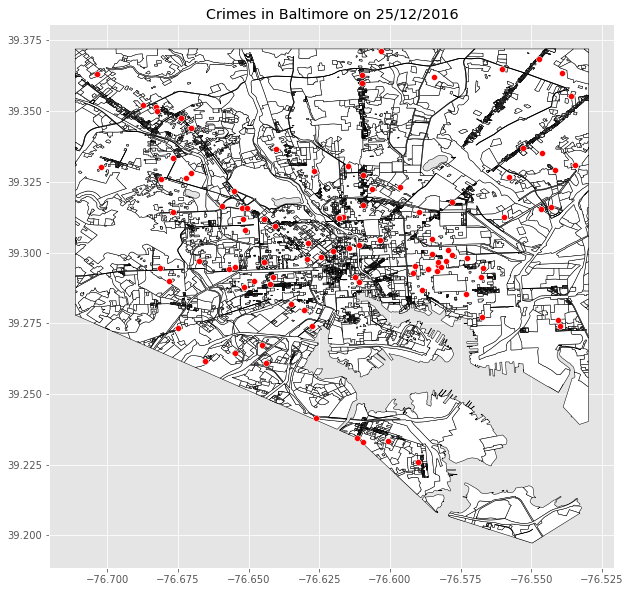

In [180]:
title_of_plot = 'Crimes in Baltimore on ' + str(date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_gp(shape_file_data_gp, df_crimes_query, title_of_plot)

# Example 2: All assaults in Baltimore on a date

Get all crimes on the following query:

In [181]:
date = datetime(2017, 3, 25)
type_of_crime = "assault"

type_of_crime_regex = "(?i)" + type_of_crime  # (?i) - ignore case

# na=False - ignore NA values
df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime == date) & 
                               (df_crimes_cp['Description'].str.contains(type_of_crime_regex, na=False))]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 18622 to 18744
Data columns (total 21 columns):
CrimeDateTime          48 non-null datetime64[ns]
CrimeDate              48 non-null object
CrimeTime              48 non-null object
CrimeCode              48 non-null object
Location               48 non-null object
Description            48 non-null object
Inside/Outside         35 non-null object
Weapon                 48 non-null object
Post                   48 non-null float64
District               48 non-null object
Neighborhood           48 non-null object
Longitude              48 non-null float64
Latitude               48 non-null float64
Lat_Long               48 non-null object
Premise                48 non-null object
DescriptionFactor      48 non-null category
WeaponFactor           48 non-null category
NeighborhoodFactor     48 non-null category
PremiseFactor          48 non-null category
InsideOutsideFactor    35 non-null category
DistrictFactor         48 non

In [182]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
18622,2017-03-25,03/25/2017,23:30:00,4E,2400 BARCLAY ST,COMMON ASSAULT,I,HANDS,341.0,EASTERN,...,-76.61133,39.31689,"(39.3168900000, -76.6113300000)",ROW/TOWNHO,COMMON ASSAULT,HANDS,Barclay,ROW/TOWNHO,I,EASTERN
18626,2017-03-25,03/25/2017,22:17:00,4E,3400 JUNEWAY,COMMON ASSAULT,I,HANDS,432.0,NORTHEASTERN,...,-76.56817,39.31812,"(39.3181200000, -76.5681700000)",ROW/TOWNHO,COMMON ASSAULT,HANDS,Belair-Edison,ROW/TOWNHO,I,NORTHEASTERN
18629,2017-03-25,03/25/2017,21:30:00,4E,3200 RAVENWOOD AVE,COMMON ASSAULT,I,HANDS,434.0,NORTHEASTERN,...,-76.57808,39.31533,"(39.3153300000, -76.5780800000)",ROW/TOWNHO,COMMON ASSAULT,HANDS,Four By Four,ROW/TOWNHO,I,NORTHEASTERN
18633,2017-03-25,03/25/2017,21:30:00,4C,REGESTER ST & E PRATT ST,AGG. ASSAULT,O,OTHER,212.0,SOUTHEASTERN,...,-76.59248,39.28929,"(39.2892900000, -76.5924800000)",STREET,AGG. ASSAULT,OTHER,Upper Fells Point,STREET,O,SOUTHEASTERN
18637,2017-03-25,03/25/2017,21:00:00,4E,900 SAINT PAUL ST,COMMON ASSAULT,O,HANDS,142.0,CENTRAL,...,-76.61424,39.29985,"(39.2998500000, -76.6142400000)",STREET,COMMON ASSAULT,HANDS,Mount Vernon,STREET,O,CENTRAL


## Plot the data

Plot the shapefile with the point of crimes:

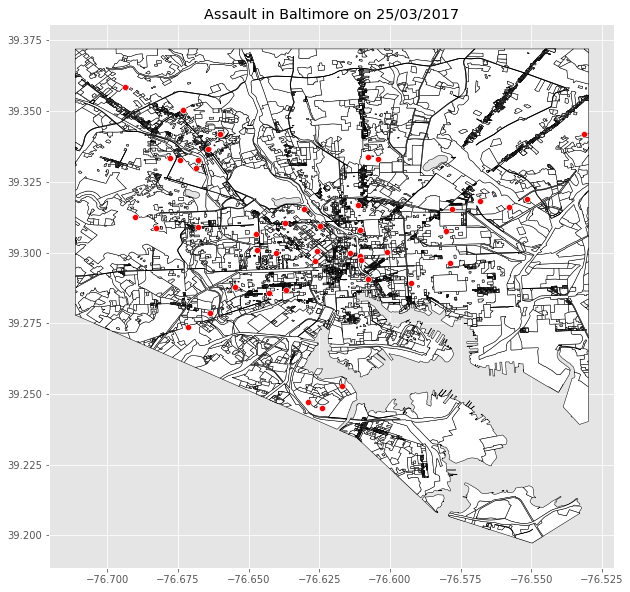

In [183]:
title_of_plot = type_of_crime.capitalize() + ' in Baltimore on ' + str(date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_gp(shape_file_data_gp, df_crimes_query, title_of_plot)

# Example 3: All crimes in Saint Paul in Baltimore on a range of date

Get all crimes on the following query:

In [184]:
date_start = datetime(2017, 5, 13)
date_end = datetime(2017, 8, 15)

location = "SAINT PAUL"
location_regex = "(?i)" + location  # (?i) - ignore case

# na=False - ignore NA values
df_crimes_query = df_crimes_cp[
                                (df_crimes_cp.CrimeDateTime >= date_start) & 
                                (df_crimes_cp.CrimeDateTime <= date_end) &
                                (df_crimes_cp['Location'].str.contains(location_regex, na=False))
                               ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 150 to 11635
Data columns (total 21 columns):
CrimeDateTime          62 non-null datetime64[ns]
CrimeDate              62 non-null object
CrimeTime              62 non-null object
CrimeCode              62 non-null object
Location               62 non-null object
Description            62 non-null object
Inside/Outside         52 non-null object
Weapon                 62 non-null object
Post                   62 non-null float64
District               62 non-null object
Neighborhood           62 non-null object
Longitude              62 non-null float64
Latitude               62 non-null float64
Lat_Long               62 non-null object
Premise                62 non-null object
DescriptionFactor      62 non-null category
WeaponFactor           62 non-null category
NeighborhoodFactor     62 non-null category
PremiseFactor          62 non-null category
InsideOutsideFactor    52 non-null category
DistrictFactor         62 non-n

In [185]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
150,2017-08-04,08/04/2017,11:29:00,6F,3500 SAINT PAUL ST,LARCENY,O,UNDEFINED,512.0,NORTHERN,...,-76.61604,39.33005,"(39.3300500000, -76.6160400000)",STREET,LARCENY,UNDEFINED,Charles Village,STREET,O,NORTHERN
197,2017-08-03,08/03/2017,22:30:00,4A,300 SAINT PAUL ST,AGG. ASSAULT,NaN,FIREARM,111.0,CENTRAL,...,-76.61350,39.29254,"(39.2925400000, -76.6135000000)",UNDEFINED,AGG. ASSAULT,FIREARM,Downtown,UNDEFINED,NaN,CENTRAL
234,2017-08-03,08/03/2017,17:44:00,6G,3500 SAINT PAUL ST,LARCENY,NaN,UNDEFINED,512.0,NORTHERN,...,-76.61604,39.33005,"(39.3300500000, -76.6160400000)",UNDEFINED,LARCENY,UNDEFINED,Charles Village,UNDEFINED,NaN,NORTHERN
386,2017-08-02,08/02/2017,15:00:00,3AK,300 SAINT PAUL ST,ROBBERY - STREET,O,KNIFE,111.0,CENTRAL,...,-76.61350,39.29254,"(39.2925400000, -76.6135000000)",STREET,ROBBERY - STREET,KNIFE,Downtown,STREET,O,CENTRAL
506,2017-08-01,08/01/2017,16:20:00,6D,3300 SAINT PAUL ST,LARCENY FROM AUTO,O,UNDEFINED,512.0,NORTHERN,...,-76.61612,39.32822,"(39.3282200000, -76.6161200000)",STREET,LARCENY FROM AUTO,UNDEFINED,Charles Village,STREET,O,NORTHERN


## Plot the data

Plot the shapefile with the point of crimes:

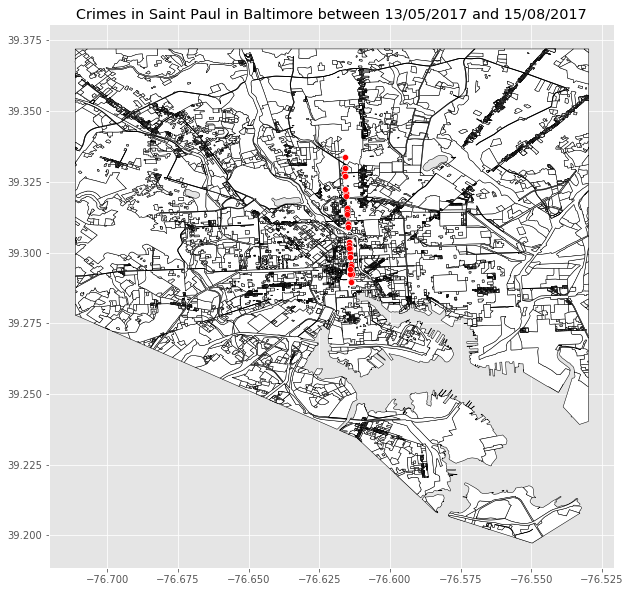

In [186]:
title_of_plot = 'Crimes in ' + location.title() + ' in Baltimore between ' + str(date_start.date().strftime("%d/%m/%Y")) + ' and ' + str(date_end.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_gp(shape_file_data_gp, df_crimes_query, title_of_plot)

More information about Pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html

# Create a new function to plot the shapefile with the points of crimes by groups (categories)

In [187]:
def plot_shapefile_and_points_by_category_gp(shape_file_gp, df_crimes, title_of_plot, 
                                             column_category, colors_dict, markers_dict, 
                                             with_undefined_values=False, xlim=[], ylim=[]):
    
    # get the groups (categories)
    groups = df_crimes.groupby(column_category)

    # use the plot with the shapefile in background
    ax = shape_file_gp.plot(markersize=6, color="white", edgecolor="gray", figsize=(15,10))

    
    # settings of the plot
    ax.set_title(title_of_plot)
        
    if xlim:  # if there are values in list...
        ax.set_xlim(xlim)
    if ylim:  # if there are values in list...
        ax.set_ylim(ylim)
    

    # plot by groups
    for name, group in groups:
        # if I don't want the UNDEFINED category, so continue the for...
        if name == "UNDEFINED" and not with_undefined_values:
            continue

    #     marker = marker_dict[name]
        color = color_dict[name]

        ax.plot(group.Longitude, # x
                group.Latitude,  # y
                marker='o', 
                linestyle='',  # without lines between the points
                label=name, c=color)

    ax.legend()

For more information: https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

# Colors and markers for categories

Specifying the colors and markers for the categories:

In [188]:
# markers and color for columns that are categories
WeaponFactor = {
                "category_column": "WeaponFactor",
                "markers_dict": {'FIREARM':'o','HANDS':'^','KNIFE':'s', 'OTHER':'x', 'UNDEFINED':'o'},
                "colors_dict": {'FIREARM':'red', 'HANDS':'green', 'KNIFE':'blue', 'OTHER':'yellow', 'UNDEFINED':'purple'},
                }

# markers_dict = {'FIREARM':'o','HANDS':'^','KNIFE':'s', 'OTHER':'x'}
# colors_dict = {'FIREARM':'red', 'HANDS':'green', 'KNIFE':'blue', 'OTHER':'yellow'}

Remove the rows that contains the 'UNDEFINED' value in the cell from "WeaponFactor" column:

In [189]:
# df_crimes_query = df_crimes_query.drop(df_crimes_query[df_crimes_query.WeaponFactor == 'UNDEFINED'].index)

# df_crimes_query.head()

# Example 4: One year of data on a neighborhood

Get all crimes on the following query:

In [190]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2016, 12, 31)
neighborhood = "Abell"

df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime >= start_date) &
                                 (df_crimes_cp.CrimeDateTime <= end_date) &
                                 (df_crimes_cp.NeighborhoodFactor == neighborhood)
                                ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 30380 to 77947
Data columns (total 21 columns):
CrimeDateTime          125 non-null datetime64[ns]
CrimeDate              125 non-null object
CrimeTime              125 non-null object
CrimeCode              125 non-null object
Location               125 non-null object
Description            125 non-null object
Inside/Outside         123 non-null object
Weapon                 125 non-null object
Post                   125 non-null float64
District               125 non-null object
Neighborhood           125 non-null object
Longitude              125 non-null float64
Latitude               125 non-null float64
Lat_Long               125 non-null object
Premise                125 non-null object
DescriptionFactor      125 non-null category
WeaponFactor           125 non-null category
NeighborhoodFactor     125 non-null category
PremiseFactor          125 non-null category
InsideOutsideFactor    123 non-null category
District

In [191]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
30380,2016-12-26,12/26/2016,00:00:00,6E,400 E 29TH ST,LARCENY,O,UNDEFINED,513.0,NORTHERN,...,-76.61088,39.32347,"(39.3234700000, -76.6108800000)",STREET,LARCENY,UNDEFINED,Abell,STREET,O,NORTHERN
31316,2016-12-19,12/19/2016,11:33:00,6J,3200 BARCLAY ST,LARCENY,O,UNDEFINED,513.0,NORTHERN,...,-76.61110,39.32728,"(39.3272800000, -76.6111000000)",STREET,LARCENY,UNDEFINED,Abell,STREET,O,NORTHERN
31366,2016-12-19,12/19/2016,02:30:00,6D,400 E 33RD ST,LARCENY FROM AUTO,O,UNDEFINED,513.0,NORTHERN,...,-76.61095,39.32822,"(39.3282200000, -76.6109500000)",STREET,LARCENY FROM AUTO,UNDEFINED,Abell,STREET,O,NORTHERN
31640,2016-12-16,12/16/2016,16:20:00,4C,3000 GREENMOUNT AVE,AGG. ASSAULT,O,OTHER,513.0,NORTHERN,...,-76.60945,39.32487,"(39.3248700000, -76.6094500000)",STREET,AGG. ASSAULT,OTHER,Abell,STREET,O,NORTHERN
32150,2016-12-12,12/12/2016,18:30:00,5B,3000 ABELL AVE,BURGLARY,I,UNDEFINED,513.0,NORTHERN,...,-76.61192,39.32495,"(39.3249500000, -76.6119200000)",ROW/TOWNHO,BURGLARY,UNDEFINED,Abell,ROW/TOWNHO,I,NORTHERN


## Plot the data

Plot the shapefile with the point of crimes, with the undefined (NaN) values:

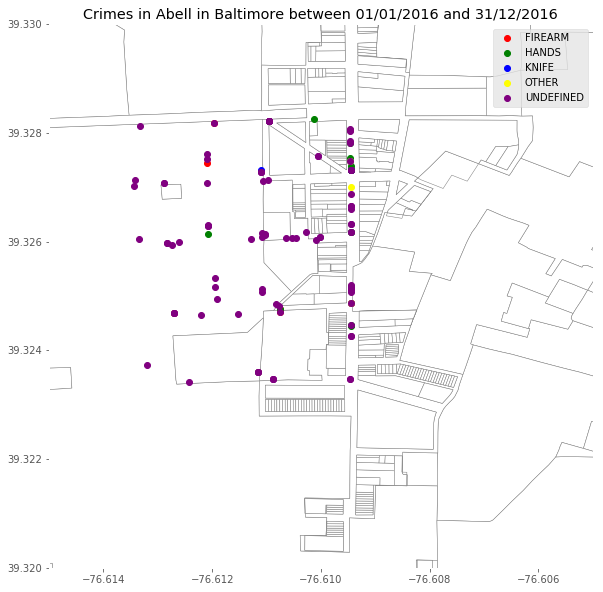

In [192]:
title_of_plot = 'Crimes in ' + neighborhood.title() + ' in Baltimore between ' + str(start_date.date().strftime("%d/%m/%Y")) + ' and ' + str(end_date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=True,
                                         xlim=[-76.615, -76.605], ylim=[39.32, 39.33])


Plot the shapefile with the point of crimes, without the undefined (NaN) values:

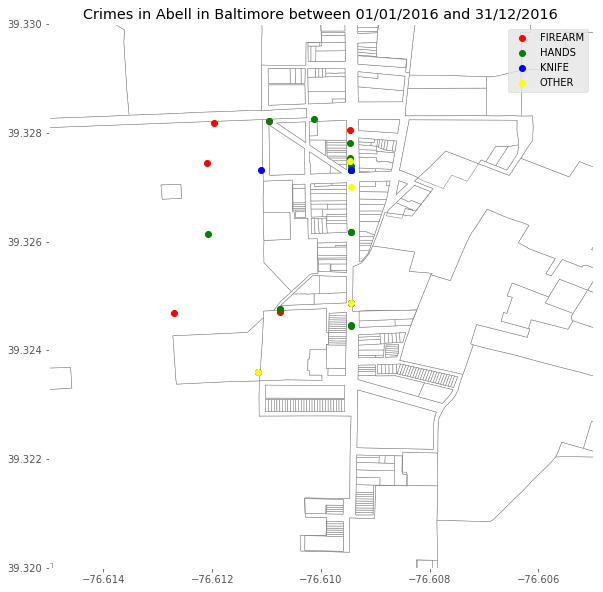

In [193]:
plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=False,
                                         xlim=[-76.615, -76.605], ylim=[39.32, 39.33])


# Example 5: One year of data on all Baltimore

Get all crimes on the following query:

In [352]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2016, 12, 31)

df_crimes_query = df_crimes_cp[(df_crimes_cp.CrimeDateTime >= start_date) &
                                 (df_crimes_cp.CrimeDateTime <= end_date)
                                ]

df_crimes_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48691 entries, 29611 to 78301
Data columns (total 21 columns):
CrimeDateTime          48691 non-null datetime64[ns]
CrimeDate              48691 non-null object
CrimeTime              48691 non-null object
CrimeCode              48691 non-null object
Location               48495 non-null object
Description            48691 non-null object
Inside/Outside         48141 non-null object
Weapon                 48691 non-null object
Post                   48677 non-null float64
District               48678 non-null object
Neighborhood           48691 non-null object
Longitude              48497 non-null float64
Latitude               48497 non-null float64
Lat_Long               48497 non-null object
Premise                48691 non-null object
DescriptionFactor      48691 non-null category
WeaponFactor           48691 non-null category
NeighborhoodFactor     48691 non-null category
PremiseFactor          48691 non-null category
InsideOutside

In [353]:
df_crimes_query.head()

,CrimeDateTime,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Longitude,Latitude,Lat_Long,Premise,DescriptionFactor,WeaponFactor,NeighborhoodFactor,PremiseFactor,InsideOutsideFactor,DistrictFactor
29611,2016-12-31,12/31/2016,23:51:00,4C,1600 E 25TH ST,AGG. ASSAULT,O,OTHER,342.0,EASTERN,...,-76.59388,39.31619,"(39.3161900000, -76.5938800000)",STREET,AGG. ASSAULT,OTHER,Darley Park,STREET,O,EASTERN
29612,2016-12-31,12/31/2016,23:30:00,6G,2000 ORLEANS ST,LARCENY,I,UNDEFINED,321.0,EASTERN,...,-76.58879,39.29539,"(39.2953900000, -76.5887900000)",RELIGIOUS,LARCENY,UNDEFINED,CARE,RELIGIOUS,I,EASTERN
29613,2016-12-31,12/31/2016,23:30:00,4E,5100 PARK HEIGHTS AVE,COMMON ASSAULT,I,HANDS,614.0,NORTHWESTERN,...,-76.67510,39.34853,"(39.3485300000, -76.6751000000)",RESTAURANT,COMMON ASSAULT,HANDS,Central Park Heights,RESTAURANT,I,NORTHWESTERN
29614,2016-12-31,12/31/2016,23:30:00,6D,2700 ODONNELL ST,LARCENY FROM AUTO,NaN,UNDEFINED,232.0,SOUTHEASTERN,...,-76.57819,39.28026,"(39.2802600000, -76.5781900000)",UNDEFINED,LARCENY FROM AUTO,UNDEFINED,Canton,UNDEFINED,NaN,SOUTHEASTERN
29615,2016-12-31,12/31/2016,23:28:00,4C,4800 MIDWOOD AVE,AGG. ASSAULT,O,OTHER,524.0,NORTHERN,...,-76.60395,39.34688,"(39.3468800000, -76.6039500000)",STREET,AGG. ASSAULT,OTHER,Kenilworth Park,STREET,O,NORTHERN


## Plot the data

Plot the shapefile with the point of crimes, with the undefined (NaN) values:

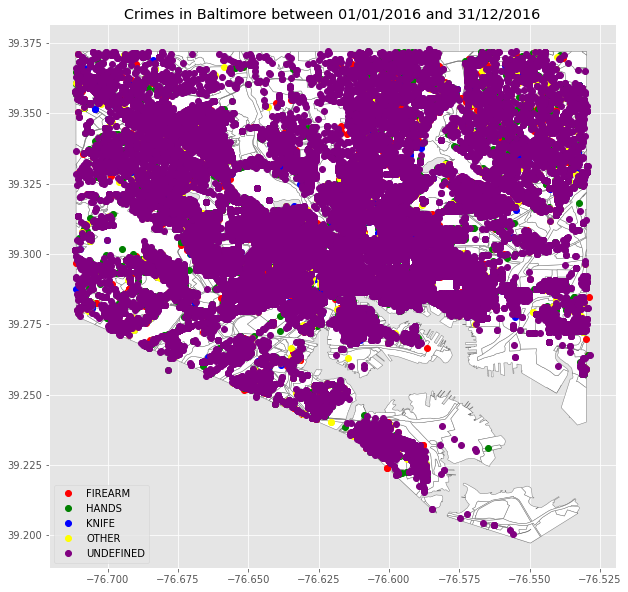

In [354]:
title_of_plot = 'Crimes in Baltimore between ' + str(start_date.date().strftime("%d/%m/%Y")) + ' and ' + str(end_date.date().strftime("%d/%m/%Y"))

plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=True)


Plot the shapefile with the point of crimes, without the undefined (NaN) values:

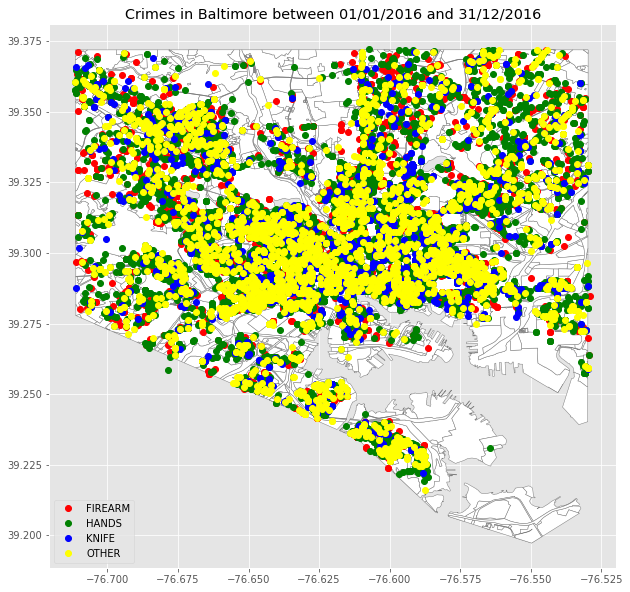

In [355]:
plot_shapefile_and_points_by_category_gp(shape_file_data_gp, df_crimes_query, title_of_plot,
                                         WeaponFactor["category_column"],
                                         WeaponFactor["colors_dict"],
                                         WeaponFactor["markers_dict"], 
                                         with_undefined_values=False)


It's confuse... Let me another alternative like a time serie. Get the amount of crimes (rows) by a date (CrimeDateTime):

In [356]:
group = df_crimes_query.groupby('CrimeDateTime').size()

group.tail()

CrimeDateTime
2016-12-27    136
2016-12-28    156
2016-12-29    127
2016-12-30    112
2016-12-31    125
dtype: int64

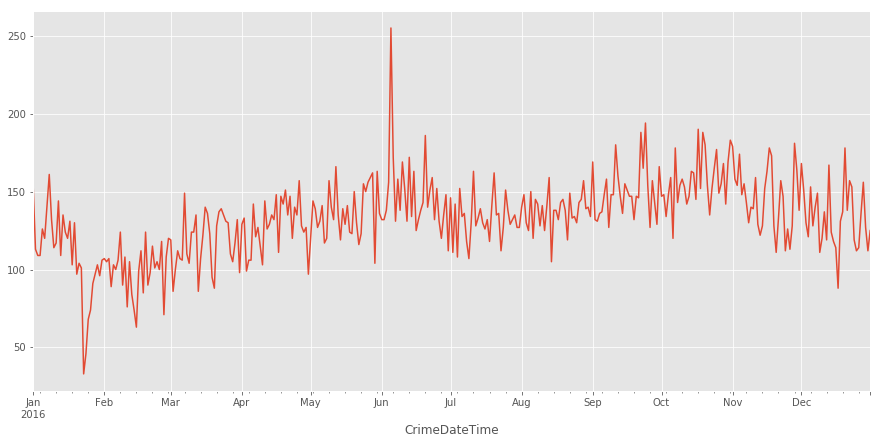

In [357]:
group.plot(figsize=(15,7))

With it we know that final of January there were little crimes, while begin of June there were a lot, on the year 2016.

In [200]:
# 

# Testing

In [358]:
group = df_crimes_query.groupby(["CrimeDateTime", "WeaponFactor"]).size()
group.head(20)

CrimeDateTime  WeaponFactor
2016-01-01     FIREARM          11
               HANDS            26
               KNIFE             3
               OTHER            11
               UNDEFINED       102
2016-01-02     FIREARM          10
               HANDS            21
               KNIFE             8
               OTHER             6
               UNDEFINED        68
2016-01-03     FIREARM          12
               HANDS            13
               KNIFE             6
               OTHER             5
               UNDEFINED        73
2016-01-04     FIREARM          11
               HANDS            10
               KNIFE             1
               OTHER             3
               UNDEFINED        84
dtype: int64

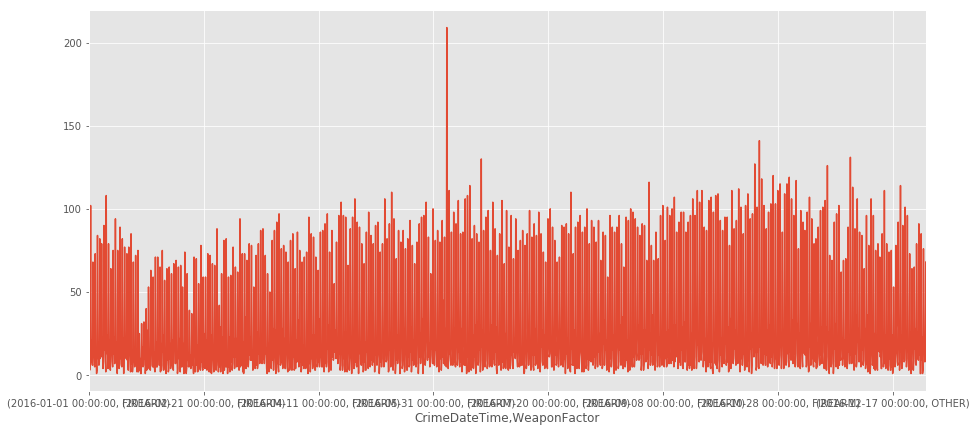

In [359]:
group.plot(figsize=(15,7))

In [360]:
group_sum = group.groupby(level=1).sum()
group_sum

WeaponFactor
FIREARM       4794
HANDS         8029
KNIFE         1749
OTHER         2838
UNDEFINED    31281
dtype: int64

In [361]:
from pandas import DataFrame

In [362]:
df = DataFrame({'count' : df_crimes_query.groupby( ["CrimeDateTime", "WeaponFactor"] ).size()}).reset_index()

df.head(10)

,CrimeDateTime,WeaponFactor,count
0,2016-01-01,FIREARM,11
1,2016-01-01,HANDS,26
2,2016-01-01,KNIFE,3
3,2016-01-01,OTHER,11
4,2016-01-01,UNDEFINED,102
5,2016-01-02,FIREARM,10
6,2016-01-02,HANDS,21
7,2016-01-02,KNIFE,8
8,2016-01-02,OTHER,6
9,2016-01-02,UNDEFINED,68
